# Adding our data science libraries

To get started we are going to use a dataset from the [Capital Bikeshare](https://www.capitalbikeshare.com/) in 2011 and 2012.

The first thing we need to do is to install and then load the [Tidyverse data science library](http://tidyverse.org).  R has thousands of additional libraries you can add to accomplish many different tasks without having to code them yourself. A partial listing is [here](https://cran.r-project.org/web/packages/available_packages_by_name.html).

In [ ]:
# install the tidyverse library
install.packages("tidyverse")

# load tidyverse into your R session
library(tidyverse)

# Load data from a CSV file

Loading data is easy. We will use the `read_csv` function to read the data from our file into a variable called `df` which is short for dataframe.  In R, you assign things to variables with the `<-` operator. 

After you run this cell R will provide a printout of how it decided to encode the column headers and the datatype of each column. Datatypes are important given functions may require specific datatypes. For example, if you encode a column of your csv file with data like "1-11-2018" as a string or character type, R will not be able to perform any date functions on it.

As with most things in R, you can override default functionality specify the datatypes as follows:

```R
df <- read_csv("data/bike_day.csv", col_types = 
  cols(instant = col_integer(),
  dteday = col_date(format = ""),
  season = col_integer(),
  yr = col_integer(),
  mnth = col_integer(),
  holiday = col_integer(),
  weekday = col_integer(),
  workingday = col_integer(),
  weathersit = col_integer(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_integer(),
  registered = col_integer(),
  cnt = col_integer()
  )
)
```

As we will see later, RStudio makes this much easier.

In [ ]:
df <- read_csv("data/bike_day.csv")

# Look at the data you loaded

To see your data, just enter your dataframe name into a code cell and execute it.

In [8]:
df

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.3441670,0.3636250,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.3634780,0.3537390,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.1963640,0.1894050,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2000000,0.2121220,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.2269570,0.2292700,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.2043480,0.2332090,0.518261,0.0895652,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.1965220,0.2088390,0.498696,0.1687260,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.1650000,0.1622540,0.535833,0.2668040,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.1383330,0.1161750,0.434167,0.3619500,54,768,822
10,2011-01-10,1,0,1,0,1,1,1,0.1508330,0.1508880,0.482917,0.2232670,41,1280,1321


A dataframe is a two dimensional matrix much like an Excel worksheet where each column has a name and data is presented in rows. 

In order to access the data from specific columns we can use the following syntax:

```R
dataframe$columnname
```

If you try this in a code cell, you will see all the potential columns show up to select if you hit `tab` after the `$` symbol.

You can access ranges of columns or rows with this syntax:

```R
dataframe[rows, columns]
dataframe[1:5,] # This would retrieve (what we call slice) the first 5 rows.
dataframe[,1:5] # This would retrieve (what we call slice) the first 5 columns.
```

You can also slice columns based on their name.

```R
dataframe['columnname'] # one column named 'columnname'
dataframe[c('columnname1','columnname2')] # two columns using `c()` combine function.
```



In [ ]:
# try slicing your dataframe here

# Visualize the data

Creating a plot of your data is often one of the first approaches data scientists use to better understand the data and specifically look at the distribution of the data.

R has two major plotting packages `plot()` and `ggplot()`. Ggplot2 is the most popular, so we will use it going forward. 

The general syntax is as follows:

```R
ggplot(data = dataframe) # this creates an empty plot that you can add layers to using the 

+ # this adds the layer functions we want to the base plot

geom_points(mapping = aes(x=x_column+name, y=y_column_name)) # geom_points says we want a scatterplot (points) and mapping = defines how we want to map variables into the x and y axes

```

The `aes()` stands for "aesthetic" and is where you define how you want to display the data on the plot. This term is derived from concepts behind the book [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448) which is also why ggplot has a "gg" in its name. 

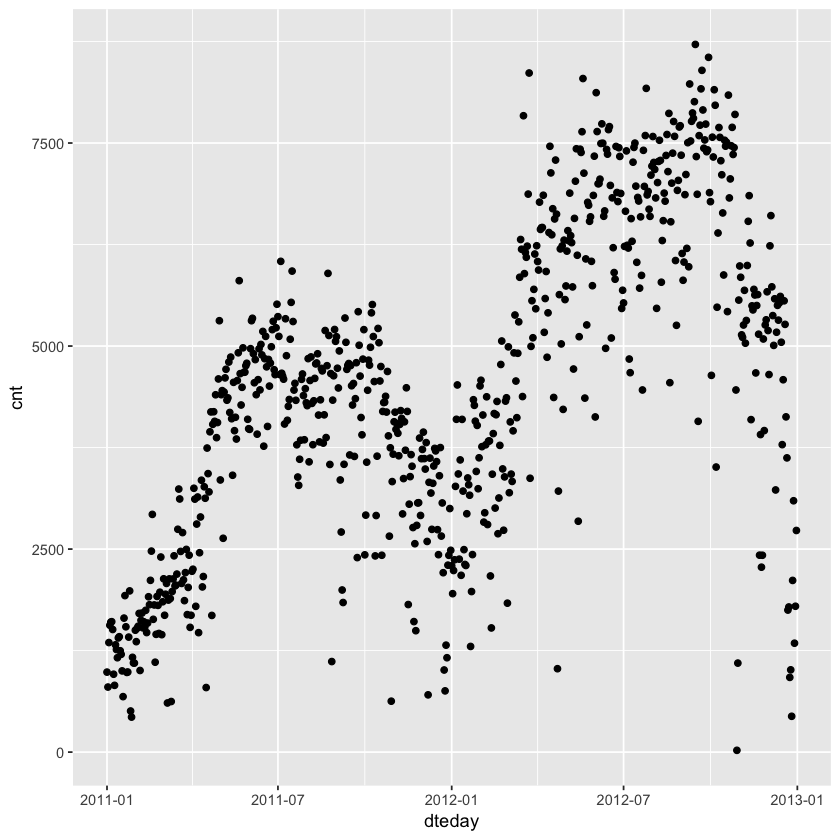

In [9]:
ggplot(data=df) + geom_point(mapping= aes(x=dteday, y=cnt))